14425.921837050122


C:\Users\mcjst\AppData\Roaming\Python\Python311\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


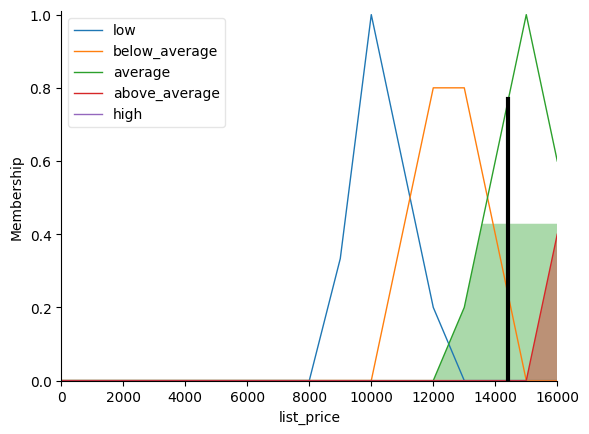

In [2]:
# The purpose of this notebook is to demonstrate fuzzy logic against crisp inputs. 
# for example, if someone describes a car as older, what degree of older is it?

# Used Chevrolet Cruze Fuzzy
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

# Antecedents and Consequent
miles = ctrl.Antecedent(np.arange(0, 176000, 23000), 'miles')
car_age = ctrl.Antecedent(np.arange(0, 14, 7), 'car_age')
list_price = ctrl.Consequent(np.arange(0, 17000, 1000), 'list_price')

# Fuzzy membership functions for miles
miles['low'] = fuzz.trimf(miles.universe, [0, 30000, 60000])
miles['average'] = fuzz.trimf(miles.universe, [15000, 60000, 105000])
miles['high'] = fuzz.trimf(miles.universe, [60000, 120000, 180000])

# Fuzzy membership functions for car_age
car_age['new'] = fuzz.trimf(car_age.universe, [0, 1, 2])
car_age['newer_than_average'] = fuzz.trimf(car_age.universe, [3, 4, 5])
car_age['average'] = fuzz.trimf(car_age.universe, [6 , 7 ,8])
car_age['older_than_average'] = fuzz.trimf(car_age.universe, [9, 10, 11])
car_age['old'] = fuzz.trimf(car_age.universe, [12, 13, 14])

# Fuzzy membership functions for list_price
list_price['low'] = fuzz.trimf(list_price.universe, [8500, 10000, 12500])
list_price['below_average'] = fuzz.trimf(list_price.universe, [10000, 12500, 15000])
list_price['average'] = fuzz.trimf(list_price.universe, [12500, 15000, 17500])
list_price['above_average'] = fuzz.trimf(list_price.universe, [15000, 17500, 20000])
list_price['high'] = fuzz.trimf(list_price.universe, [17500, 20000, 22500])

# Define rules
rule1 = ctrl.Rule(miles['low'] & car_age['new'], list_price['high'])  # Rule 1
rule2 = ctrl.Rule(miles['low'] & car_age['older_than_average'], list_price['below_average'])  # Rule 2
rule3 = ctrl.Rule(miles['high'] & car_age['old'], list_price['low'])  # Rule 3
rule4 = ctrl.Rule(miles['high'] & car_age['newer_than_average'], list_price['above_average'])  # Rule 4
rule5 = ctrl.Rule(miles['average'] & car_age['average'], list_price['average'])  # Rule 5
rule6 = ctrl.Rule(miles['high'] & car_age['average'], list_price['below_average'])  # Rule 6
rule7 = ctrl.Rule(miles['low'] & car_age['average'], list_price['above_average'])  # Rule 7

# Create control system
control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])

# Create simulation
control_simulation = ctrl.ControlSystemSimulation(control)

# Test the system
control_simulation.input['miles'] = 45000
control_simulation.input['car_age'] = 3
control_simulation.compute()

# View the result
print(control_simulation.output['list_price'])
list_price.view(sim=control_simulation)
